In [880]:
import numpy as np
import pandas as pd
from functools import reduce
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
#pd.set_option("precision",4)

# Market Data for US

In [881]:
df_CRSP_market_daily=pd.read_csv('../data/CRSP/CRSP Daily Index Built on Market Capitalization.csv',\
index_col=0,parse_dates=True)

In [882]:
df_CRSP_market_daily =df_CRSP_market_daily[['vwretd']]['2001-01-01':'2020-12-31']

In [883]:
df_AQR_risk_free_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='RF',header=18,index_col=0,parse_dates=True)
df_AQR_risk_free_daily= df_AQR_risk_free_daily['2001-01-01':'2020-12-31']

In [892]:
df_AQR_MKT_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='MKT',header=18,index_col=0,parse_dates=True)
df_AQR_MKT_daily= df_AQR_MKT_daily['2001-01-01':'2020-12-31']

In [893]:
df_FF_5=pd.read_csv('../data/FF_Factors/F-F_Research_Data_5_Factors_2x3_daily.csv',index_col=0,parse_dates=True)
df_FF_5 = df_FF_5['2001-01-01':'2020-12-31']/100

In [894]:
df_FF_5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2001-01-02,-0.0352,0.0039,0.0165,0.0158,0.0161,0.00026
2001-01-03,0.0539,-0.0065,-0.0439,-0.0266,-0.0594,0.00026
2001-01-04,-0.0130,0.0097,-0.0030,0.0052,-0.0080,0.00026
2001-01-05,-0.0298,0.0071,0.0238,0.0190,0.0231,0.00026
2001-01-08,-0.0036,-0.0043,0.0126,0.0098,0.0067,0.00026
...,...,...,...,...,...,...
2020-12-24,0.0021,-0.0043,-0.0017,0.0024,-0.0005,0.00000
2020-12-28,0.0046,-0.0065,0.0032,0.0146,0.0050,0.00000
2020-12-29,-0.0040,-0.0142,0.0024,0.0075,-0.0028,0.00000


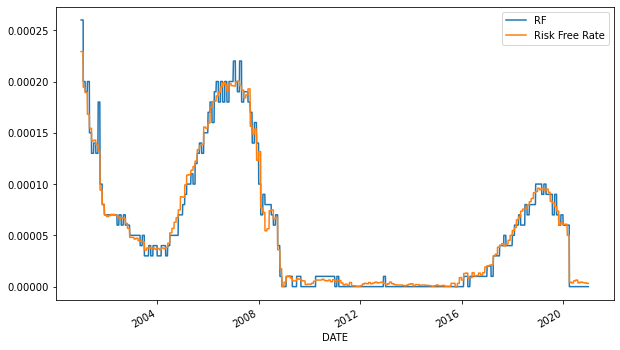

In [895]:
fig, ax =plt.subplots(figsize=(10,6))

df_FF_5.RF.plot(ax=ax)
(df_AQR_risk_free_daily).plot(ax=ax)

plt.legend()

In [896]:
dfs_market_merged=[df_FF_5[['Mkt-RF']],df_CRSP_market_daily[['vwretd']],df_AQR_MKT_daily[['USA']]]
dfs_market_merged=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs_market_merged)

<AxesSubplot:>

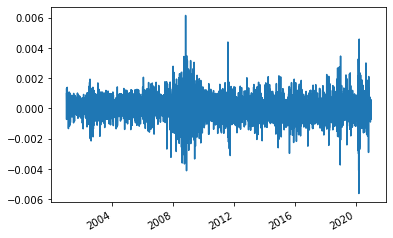

In [897]:
(dfs_market_merged['vwretd']-dfs_market_merged['Mkt-RF']).plot()

In [898]:
dfs_market_merged

,Mkt-RF,vwretd,USA
2001-01-02,-0.0352,-0.034230,-0.034543
2001-01-03,0.0539,0.053170,0.053313
2001-01-04,-0.0130,-0.011674,-0.010935
2001-01-05,-0.0298,-0.028909,-0.028499
2001-01-08,-0.0036,-0.003410,-0.003914
...,...,...,...
2020-12-24,0.0021,0.002332,0.002347
2020-12-28,0.0046,0.003870,0.003893
2020-12-29,-0.0040,-0.003649,-0.003812
2020-12-30,0.0027,0.003281,0.003364


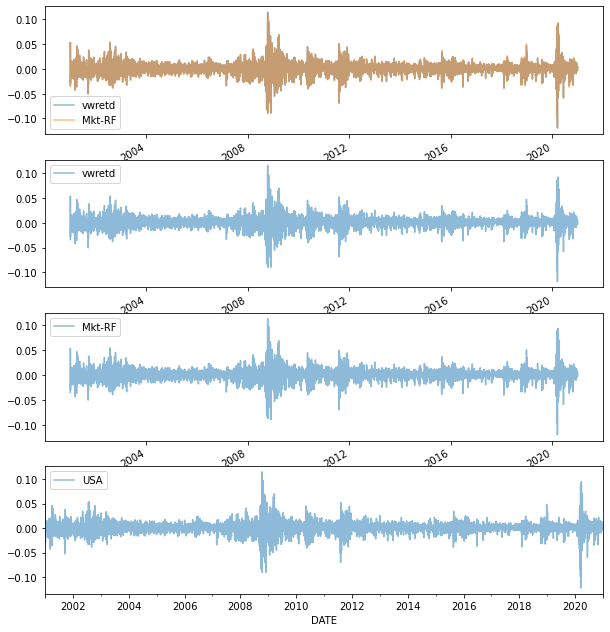

In [899]:
fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(10,12))

(df_CRSP_market_daily.vwretd).plot(ax=ax[0],alpha=0.5)
df_FF_5['Mkt-RF'].plot(ax=ax[0],alpha=0.5)

(df_CRSP_market_daily.vwretd).plot(ax=ax[1],alpha=0.5)

df_FF_5['Mkt-RF'].plot(ax=ax[2],alpha=0.5)

df_AQR_MKT_daily['USA'].plot(ax=ax[3],alpha=0.5)

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

# Construct the Table 3 for US

In [1068]:
def get_alpha(df, factors,portfolio):
    x = df[factors].copy()
    x = sm.add_constant(x)
    results = sm.OLS(df_Port_FF5[portfolio], x).fit(cov_type='HC1')
    return results.params[0],results.params[1],results.tvalues[0]

In [1129]:
df_betas=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/beta.pickle')
df_returns=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/return.pickle')
df_betas = df_betas.astype('float64')
df_returns = df_returns.astype('float64')

<AxesSubplot:>

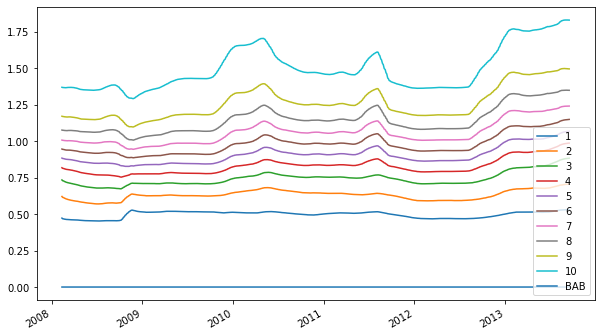

In [1130]:
df_betas.rolling(30).mean().plot(figsize=(10,6))

<AxesSubplot:>

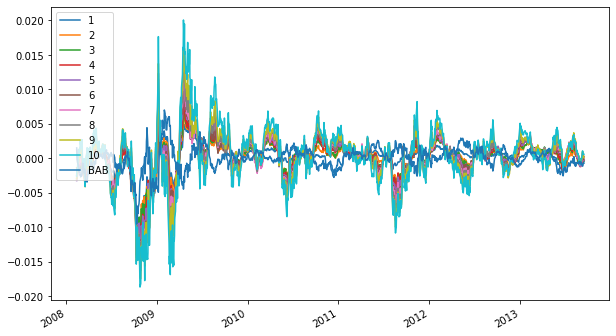

In [1131]:
df_returns.rolling(30).mean().plot(figsize=(10,6))

In [1132]:
df_table_3=pd.DataFrame(index=['Excess Return','CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha','Beta(ex ante)','Beta(realized)','Volatility','Sharpe Ratio'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [1133]:
df_table_4=pd.DataFrame(index=['CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [1134]:
df_Port_FF5=df_returns.merge(df_FF_5,left_index=True,right_index=True)
df_Port_FF5 = df_Port_FF5.dropna()

In [1135]:
df_Port_FF5 = df_Port_FF5['2009-01-01':]

In [1136]:
df_Port_FF5.index

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2013-09-03', '2013-09-04', '2013-09-05', '2013-09-06',
               '2013-09-09', '2013-09-10', '2013-09-11', '2013-09-12',
               '2013-09-13', '2013-09-16'],
              dtype='datetime64[ns]', length=1184, freq=None)

In [1137]:
df_Port_FF5

,1,2,3,4,5,6,7,8,9,10,BAB,Mkt-RF,SMB,HML,RMW,CMA,RF
2009-01-02,0.027545,0.023646,0.023103,0.028013,0.034537,0.030394,0.025675,0.028508,0.038805,0.042193,0.010155,0.0311,-0.0136,-0.0042,-0.0020,-0.0015,0.0
2009-01-05,0.016488,0.013279,0.007245,0.008639,0.007574,0.004934,0.005089,0.011262,0.013678,0.020106,0.007909,-0.0028,0.0036,-0.0115,-0.0037,-0.0055,0.0
2009-01-06,0.018553,0.019232,0.016392,0.017807,0.027616,0.024362,0.028865,0.031070,0.036421,0.056896,-0.006464,0.0087,0.0113,0.0087,-0.0048,-0.0012,0.0
2009-01-07,-0.004602,-0.009844,-0.012357,-0.021955,-0.029134,-0.028901,-0.033004,-0.039683,-0.042392,-0.051773,0.020882,-0.0296,-0.0001,-0.0115,0.0025,0.0011,0.0
2009-01-08,0.012118,0.008444,0.007053,0.005531,0.008697,0.010400,0.009596,0.010335,0.010326,0.020821,0.002354,0.0047,0.0066,0.0042,-0.0031,0.0066,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-10,0.000270,0.001634,0.005228,0.006188,0.003995,0.008040,0.008175,0.008152,0.007469,0.006826,-0.001412,0.0080,0.0006,0.0021,-0.0015,0.0005,0.0
2013-09-11,-0.002088,-0.001450,0.001837,0.001039,0.002288,0.000206,0.002036,0.000408,0.001424,0.001515,-0.001599,0.0028,-0.0024,0.0004,0.0019,0.0015,0.0
2013-09-12,-0.000113,-0.001598,-0.002811,-0.002047,-0.004500,-0.005173,-0.005268,-0.006808,-0.010209,-0.008648,0.003289,-0.0032,-0.0028,-0.0037,0.0015,-0.0014,0.0
2013-09-13,0.002219,0.001640,0.003330,0.002411,0.005625,0.003351,0.004425,0.004494,0.004967,0.004761,0.000279,0.0029,0.0028,-0.0004,0.0015,0.0023,0.0


In [1138]:
columns = np.concatenate((np.arange(1,11,1), ['BAB'])).astype(str)

df_table_3.loc[df_table_3.index=='Excess Return',:]=\
((((1+df_Port_FF5).cumprod().iloc[-1,:11])**(252/len(df_Port_FF5))-1)*100).values/12

df_table_3.loc[df_table_3.index=='CAPM alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Three-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Four-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Five-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW','CMA'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Beta(ex ante)',:]=\
df_betas.mean().values

df_table_3.loc[df_table_3.index=='Beta(realized)',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF'],i)[1] for i in columns]

df_table_3.loc[df_table_3.index=='Volatility',:]=\
[df_Port_FF5[i].std()*np.sqrt(252)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Sharpe Ratio',:]=\
(df_table_3.loc['Excess Return']*12/df_table_3.loc['Volatility'])[:].values

In [1139]:
df_table_3

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
Excess Return,1.04197,1.32605,1.42141,1.34301,1.57699,1.31754,1.35702,1.11317,1.26676,1.28019,0.631889
CAPM alpha,0.782144,0.664991,0.448469,0.185471,0.210943,-0.183118,-0.309312,-0.698666,-0.720689,-1.0042,1.59518
Three-factor alpha,0.807627,0.667937,0.435638,0.164762,0.220161,-0.146633,-0.238176,-0.581979,-0.565564,-0.691503,1.43407
Four-factor alpha,0.791347,0.661948,0.44029,0.173887,0.22231,-0.149714,-0.241477,-0.595534,-0.580137,-0.709443,1.44112
Five-factor alpha,0.806221,0.629961,0.414724,0.157138,0.223675,-0.124731,-0.189929,-0.513973,-0.438837,-0.507129,1.28671
Beta(ex ante),0.496679,0.630836,0.742904,0.828648,0.904015,0.977265,1.05638,1.14485,1.25799,1.49579,0
Beta(realized),0.165243,0.415314,0.627502,0.769369,0.910058,1.04079,1.17795,1.3271,1.48105,1.80345,-0.544102
Volatility,6.55978,9.86185,13.619,16.3228,19.0886,21.7635,24.6506,27.831,31.0977,38.3996,13.7824
Sharpe Ratio,1.90611,1.61355,1.25244,0.987339,0.991371,0.726467,0.660604,0.47997,0.488818,0.400064,0.550172


In [1106]:
df_table_4.loc[df_table_4.index=='CAPM alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Three-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Four-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Five-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW','CMA'],i)[2] for i in columns]


In [1107]:
df_table_4

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
CAPM alpha,0.0178329,-0.193727,0.00734855,-1.17509,-0.620459,-1.97827,-1.69386,-2.12147,-1.69224,-1.24384,1.05568
Three-factor alpha,0.130008,-0.26472,-0.22838,-1.82074,-1.60917,-4.03408,-4.20541,-5.37631,-4.17707,-2.70995,1.56477
Four-factor alpha,0.219961,-0.0090315,0.173948,-1.45357,-1.31562,-3.90392,-4.01455,-5.32465,-4.14497,-2.69559,1.86929
Five-factor alpha,0.317443,0.060527,0.174022,-1.36362,-1.10244,-3.64868,-3.70936,-4.98735,-3.64248,-2.17269,1.60263
